<a href="https://colab.research.google.com/github/geoc1234/sourdough/blob/development/notebooks/Factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ganzle, et al (1) found the growth rates of two strains of LAB and the c. milleri strain of yeast could be fit to:
$$\mu =  a \cdot x^b \cdot e^{-c \cdot x}\tag{1}$$

with parameters a, b, and c depending on the organism and $x = T_{max} - T$, with T in degrees C. It is helpful to plot the rate constants, $\mu$, for the individual species on top of each other.

<font size = "1">(1) APPLIED AND ENVIRONMENTAL MICROBIOLOGY,
July 1998, p. 2616–2623


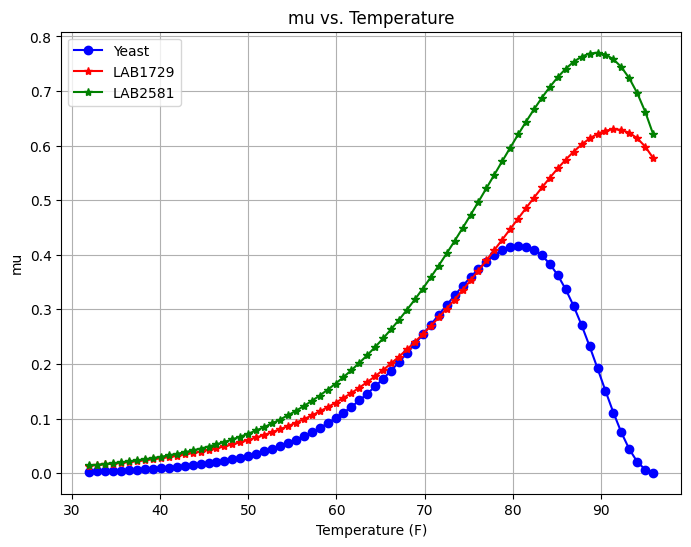

In [1]:
# @title
import matplotlib.pyplot as plt
import numpy as np

yeast = [0.029, 3.0, 0.34, 35.9, 0.42]
LAB1729 = [0.19, 1.5, 0.19, 41.0, 0.67]
LAB2581 = [0.097, 2.0, 0.22, 41.0, 0.71]

def mu(T, params):
    a, b, c, Tmax, mu_opt = params
    x = Tmax-T
    return mu_opt * a * x**b * np.exp(-c * x)

temperature_celsius = np.arange(0, yeast[3], 0.5) # in centigrade
temperature_fahrenheit = (temperature_celsius * 9/5) + 32 # Convert to Fahrenheit

mu_y = mu(temperature_celsius, yeast)
mu_l1 = mu(temperature_celsius, LAB1729)
mu_l2 = mu(temperature_celsius, LAB2581)

# Plotting the data
plt.figure(figsize=(8, 6))
plt.plot(temperature_fahrenheit, mu_y, marker='o', linestyle='-', color='b', label='Yeast')
plt.plot(temperature_fahrenheit, mu_l1, marker='*', linestyle='-', color='r', label='LAB1729')
plt.plot(temperature_fahrenheit, mu_l2, marker='*', linestyle='-', color='g', label='LAB2581')
plt.title('mu vs. Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('mu')
plt.grid(True)
plt.legend()
plt.show()

One can see from the plots that, at essentially all values of T, the bacteria strains grow faster than the yeast. Next, we plot the rato of yeast to the faster growing bacteria strain (LAB2581).

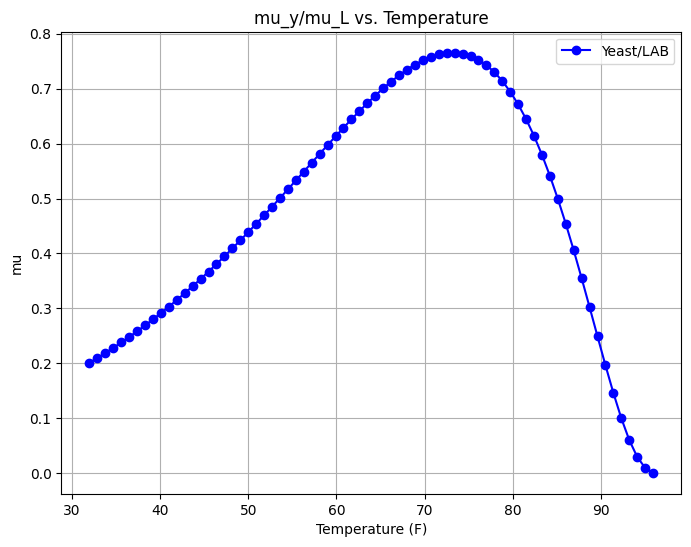

In [2]:
mu_y_LAB2581 = mu_y / mu_l2
# Plotting the data
plt.figure(figsize=(8, 6))
plt.plot(temperature_fahrenheit, mu_y_LAB2581, marker='o', linestyle='-', color='b', label='Yeast/LAB')
plt.title('mu_y/mu_L vs. Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('mu')
plt.grid(True)
plt.legend()
plt.show()

The growth rate of the LAB bacteria is greater than that for yeast at all temperatures. That aside, the plot also shows yeast has it's highest growth rate relative to LAB at 70F - 74F, even though the yeast growth curve peaks at 80F.

Next, we compute the single factor function for pH

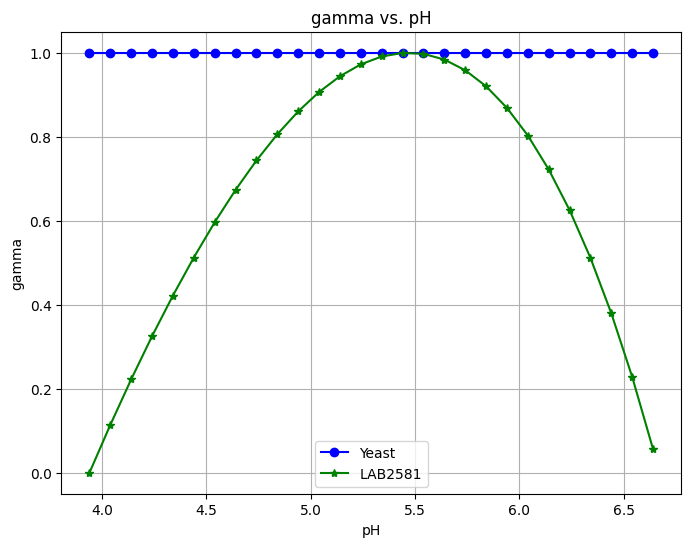

In [3]:
def gamma_pH(pH, params):
    factor, pHmin, pHmax, pHopt = params
    if pHmin == 0 and pHmax == 0:
        return factor * np.ones_like(pH)
    return factor * (pH - pHmin) * (pH - pHmax)/((pH - pHmin) * (pH - pHmax) - (pH - pHopt)**2 )

LAB2581_pH = [1.0, 3.94, 6.67, 5.47]
yeast_pH = [1.0, 0.0, 0.0, 0.0]

pH = np.arange(3.94, 6.67, 0.1)
mu_l2_pH = gamma_pH(pH, LAB2581_pH)
mu_y_pH = gamma_pH(pH, yeast_pH)
# Plotting the data
plt.figure(figsize=(8, 6))
plt.plot(pH, mu_y_pH, marker='o', linestyle='-', color='b', label='Yeast')
plt.plot(pH, mu_l2_pH, marker='*', linestyle='-', color='g', label='LAB2581')
plt.title('gamma vs. pH')
plt.xlabel('pH')
plt.ylabel('gamma')
plt.grid(True)
plt.legend()
plt.show()

Next we calculate the single factor expression for ionic strength.  Different models of the impact on mu are used for yeast and LAB, respectively.

0.5603448275862069


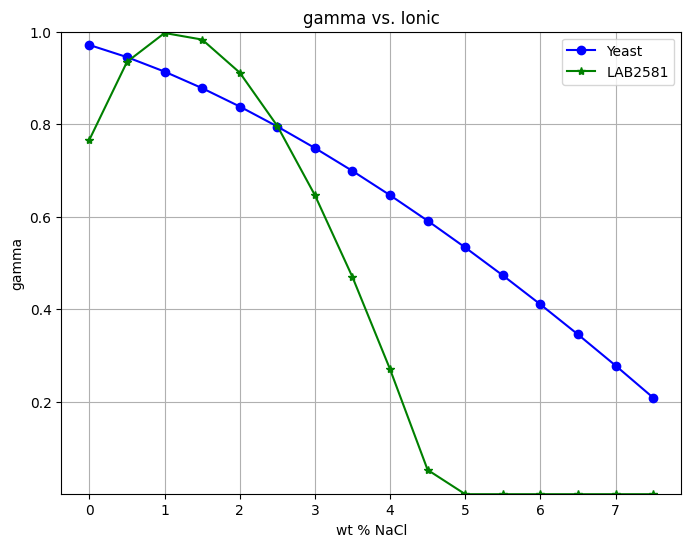

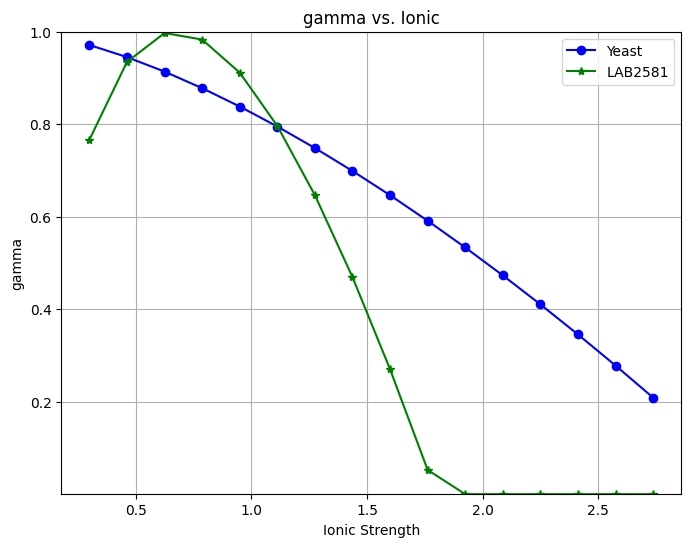

In [24]:
def gamma_I_model3(I, params):
    factor, Imax, Iopt = params
    out_of_bounds_mask = (I > Imax)
    y = factor * I * (I - Imax)/(I * (I - Imax) - (I - Iopt)**2)
    y[out_of_bounds_mask] = 0.0
    return y

def gamma_I_model4(I, params):
    factor, Imax, a = params
    out_of_bounds_mask = (I > Imax)
    y = factor *(1 - (I/Imax)**a)
    y[out_of_bounds_mask] = 0.0
    return y

LAB2581_I = [1.0, 1.8, 0.67]
yeast_I = [1.0, 3.2, 1.5]

NaCl = np.arange(0.0, 0.08, 0.005)
Ionic = NaCl * 32.5 + 0.3
Hydration = 32.5/58
print(Hydration)

#Ionic = np.arange(0.2, 3.9, 0.2)

mu_l2_I = gamma_I_model3(Ionic, LAB2581_I)
mu_y_I = gamma_I_model4(Ionic, yeast_I)

# Plotting the data
plt.figure(figsize=(8, 6))
plt.plot(100*NaCl, mu_y_I, marker='o', linestyle='-', color='b', label='Yeast')
plt.plot(100*NaCl, mu_l2_I, marker='*', linestyle='-', color='g', label='LAB2581')
plt.title('gamma vs. Ionic')
plt.xlabel('wt % NaCl')
plt.ylabel('gamma')
plt.ylim(0.001, 1.0)
plt.grid(True)
plt.legend()
plt.show()

# Plotting the data
plt.figure(figsize=(8, 6))
plt.plot(Ionic, mu_y_I, marker='o', linestyle='-', color='b', label='Yeast')
plt.plot(Ionic, mu_l2_I, marker='*', linestyle='-', color='g', label='LAB2581')
plt.title('gamma vs. Ionic')
plt.xlabel('Ionic Strength')
plt.ylabel('gamma')
plt.ylim(0.001, 1.0)
plt.grid(True)
plt.legend()
plt.show()

Putting it together:

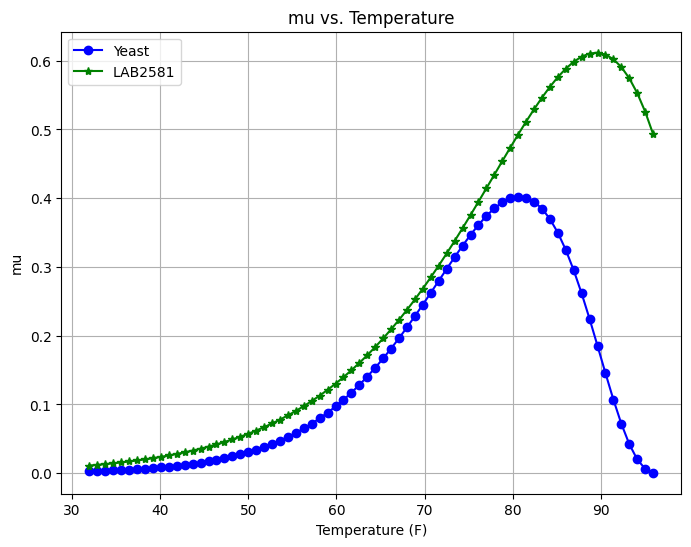

In [26]:
def gamma_y_composite(T,pH,I,E,params):
  pT = params[0]
  pP = params[1]
  pI = params[2]
  pE = params[3]
  yT = mu(T,pT)
  yP = gamma_pH(pH,pP)
  yI = gamma_I_model4(I,pI)
  yE = gamma_I_model4(E,pE)
  return yT*yP*yI*yE

def gamma_l2_composite(T,pH,I,E, params):
  pT = params[0]
  pP = params[1]
  pI = params[2]
  pE = params[3]
  yT = mu(T,pT)
  yP = gamma_pH(pH,pP)
  yI = gamma_I_model3(I,pI)
  yE = gamma_I_model4(E,pE)
  return yT*yP*yI*yE

# Update the parameters to incorporate the tweaks to the values needed for the
# multi-factor case
yeast_T = [0.029, 3.0, 0.34, 35.9, 0.52]
LAB2581_T = [0.097, 2.0, 0.22, 41.0, 0.66]
yeast_pH = [1.0, 0.0, 0.0, 0.0]
LAB2581_pH = [1.0, 3.94, 6.6, 5.43]
LAB2581_I = [1.0, 1.97, 0.45]
yeast_I = [1.0, 3.2, 1.4]
LAB2581_E = [1.0, 8.12, 9.5]
yeast_E = [1.0, 8.2, 1.0]

params_y = [yeast_T, yeast_pH, yeast_I, yeast_E]
params_l = [LAB2581_T, LAB2581_pH, LAB2581_I, LAB2581_E]

I = 0.67*np.ones_like(temperature_celsius)
pH = 5.0*np.ones_like(temperature_celsius)
E = 1.0*np.ones_like(temperature_celsius)
mu_y_c = gamma_y_composite(temperature_celsius, pH, I, E, params_y)
mu_l2_c = gamma_l2_composite(temperature_celsius, pH, I, E, params_l)

# Plotting the data
plt.figure(figsize=(8, 6))
plt.plot(temperature_fahrenheit, mu_y_c, marker='o', linestyle='-', color='b', label='Yeast')
#plt.plot(temperature_fahrenheit, mu_y, marker='o', linestyle='-', color='r', label='Yeast0')
plt.plot(temperature_fahrenheit, mu_l2_c, marker='*', linestyle='-', color='g', label='LAB2581')
#plt.plot(temperature_fahrenheit, mu_l2, marker='*', linestyle='-', color='r', label='LAB25810')
plt.title('mu vs. Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('mu')
plt.grid(True)
plt.legend()
plt.show()

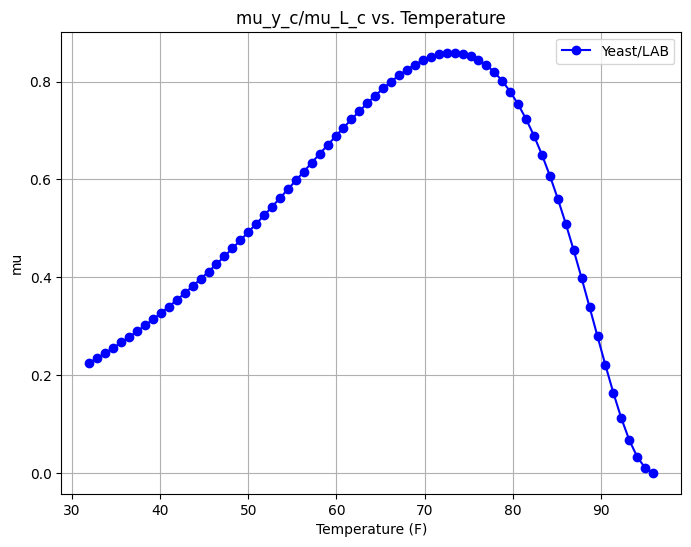

In [11]:
mu_y_LAB2581_c = mu_y_c / mu_l2_c
# Plotting the data
plt.figure(figsize=(8, 6))
plt.plot(temperature_fahrenheit, mu_y_LAB2581_c, marker='o', linestyle='-', color='b', label='Yeast/LAB')
plt.title('mu_y_c/mu_L_c vs. Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('mu')
plt.grid(True)
plt.legend()
plt.show()

In [35]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

def plot_nacl_effect(nacl_concentration_wt_percent=1.14, pH_val=5.0, ethanol_concentration=1.0):
    # Convert wt % NaCl to Ionic Strength
    NaCl_fraction = nacl_concentration_wt_percent / 100.0
    I_scalar = NaCl_fraction * 32.5 + 0.3 # Calculate scalar ionic strength
    I = I_scalar * np.ones_like(temperature_celsius)
    pH = pH_val * np.ones_like(temperature_celsius)
    E = ethanol_concentration * np.ones_like(temperature_celsius)

    mu_y_c = gamma_y_composite(temperature_celsius, pH, I, E, params_y)
    mu_l2_c = gamma_l2_composite(temperature_celsius, pH, I, E, params_l)

    # Plotting the data
    plt.figure(figsize=(8, 6))
    plt.plot(temperature_fahrenheit, mu_y_c, marker='o', linestyle='-', color='b', label='Yeast')
    plt.plot(temperature_fahrenheit, mu_l2_c, marker='*', linestyle='-', color='g', label='LAB2581')
    plt.title(f'mu vs. Temperature at NaCl = {nacl_concentration_wt_percent:.2f} wt%, pH = {pH_val:.2f}, Ethanol = {ethanol_concentration:.2f}')
    plt.xlabel('Temperature (F)')
    plt.ylabel('mu')
    # plt.xlim(temperature_fahrenheit[0], 50.0)
    plt.grid(True)
    plt.legend()
    plt.show()

# uncomment the below lines of code in order to use the sliders

interact(plot_nacl_effect,
         nacl_concentration_wt_percent=widgets.FloatSlider(min=0.0, max=8.5, step=0.1, value=2.0, description='NaCl wt%'),
         pH_val=widgets.FloatSlider(min=3.0, max=7.0, step=0.1, value=4.5, description='pH'),
         ethanol_concentration=widgets.FloatSlider(min=0.0, max=10.0, step=0.1, value=1.0, description='Ethanol'));

interactive(children=(FloatSlider(value=2.0, description='NaCl wt%', max=8.5), FloatSlider(value=4.5, descript…